In [1]:
import rdkit.Chem
from rdkit import Chem
from rdkit import DataStructs
from rdkit.Chem.Fingerprints import FingerprintMols
import itertools
import scipy.stats
from scipy.spatial import distance
import collections

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy as sp
import rdkit.Chem
import csv
from tqdm import tqdm

In [3]:
#ring_smiles = np.loadtxt('./RingSmiles.csv', delimiter=',', dtype = 'str')
ring_smiles = pd.read_csv('./RingSmiles.csv')
ring_smiles = ring_smiles['0']

In [4]:
ring_smiles = ring_smiles.drop_duplicates()

In [5]:
ring_smiles

0      Cc1ccc2c(c1)cc(C(=O)N1CC[C@H](C(=O)N3CCCCC3)C1...
1                    O[C@@H]1C=C[C@H](O)[C@H](O)[C@@H]1O
2                                    C1CC1N[C@@H]1CCCSC1
3                                  CC1(C)CC[C@H](C#N)N1O
4                                      O=C1CCC[C@H](O)N1
                             ...                        
995                                         Cc1csc(CO)c1
996                                     Nc1nccn[n+]1[O-]
997                                   C[C@H]1SC(=N)NC1=O
998                                         CCn1cccc1C#N
999                          O=C1N[C@H](C(=O)O)C[C@@H]1O
Name: 0, Length: 985, dtype: object

In [6]:
mol_names = list(set(ring_smiles))
mols = [Chem.MolFromSmiles(x) for x in mol_names]
#mols = [Chem.rdmolops.AddHs(Chem.MolFromSmiles(x)) for x in mol_names]

fps = [FingerprintMols.FingerprintMol(x,  minPath=1, maxPath=7, fpSize=2048,
                               bitsPerHash=2, useHs=True, tgtDensity=0.0,
                               minSize=128) for x in mols]
tanimoto_matrix = pd.DataFrame()
for n in tqdm(range(len(fps))):
    s = DataStructs.BulkTanimotoSimilarity(fps[n], fps)
    tanimoto_matrix[mol_names[n]] = s
    
tanimoto_noindex = tanimoto_matrix

tanimoto_matrix

  0%|                                                   | 0/985 [00:00<?, ?it/s]/var/folders/qc/kdqppv890tsc3zsxkk7rypjm0000gs/T/ipykernel_85192/39297148.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tanimoto_matrix[mol_names[n]] = s
 10%|████                                    | 101/985 [00:00<00:00, 911.68it/s]/var/folders/qc/kdqppv890tsc3zsxkk7rypjm0000gs/T/ipykernel_85192/39297148.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tanimoto_matrix[mol_names[n]] = s
/var/folders/qc/kdqppv890tsc3zsxkk7rypjm0000gs/T/ipy

/var/folders/qc/kdqppv890tsc3zsxkk7rypjm0000gs/T/ipykernel_85192/39297148.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tanimoto_matrix[mol_names[n]] = s
/var/folders/qc/kdqppv890tsc3zsxkk7rypjm0000gs/T/ipykernel_85192/39297148.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tanimoto_matrix[mol_names[n]] = s
/var/folders/qc/kdqppv890tsc3zsxkk7rypjm0000gs/T/ipykernel_85192/39297148.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poo

/var/folders/qc/kdqppv890tsc3zsxkk7rypjm0000gs/T/ipykernel_85192/39297148.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tanimoto_matrix[mol_names[n]] = s
/var/folders/qc/kdqppv890tsc3zsxkk7rypjm0000gs/T/ipykernel_85192/39297148.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tanimoto_matrix[mol_names[n]] = s
/var/folders/qc/kdqppv890tsc3zsxkk7rypjm0000gs/T/ipykernel_85192/39297148.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poo

 20%|███████▊                                | 193/985 [00:00<00:01, 486.01it/s]/var/folders/qc/kdqppv890tsc3zsxkk7rypjm0000gs/T/ipykernel_85192/39297148.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tanimoto_matrix[mol_names[n]] = s
/var/folders/qc/kdqppv890tsc3zsxkk7rypjm0000gs/T/ipykernel_85192/39297148.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tanimoto_matrix[mol_names[n]] = s
/var/folders/qc/kdqppv890tsc3zsxkk7rypjm0000gs/T/ipykernel_85192/39297148.py:11: PerformanceWarning: DataFrame is highly fragmented.

/var/folders/qc/kdqppv890tsc3zsxkk7rypjm0000gs/T/ipykernel_85192/39297148.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tanimoto_matrix[mol_names[n]] = s
/var/folders/qc/kdqppv890tsc3zsxkk7rypjm0000gs/T/ipykernel_85192/39297148.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tanimoto_matrix[mol_names[n]] = s
/var/folders/qc/kdqppv890tsc3zsxkk7rypjm0000gs/T/ipykernel_85192/39297148.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poo

/var/folders/qc/kdqppv890tsc3zsxkk7rypjm0000gs/T/ipykernel_85192/39297148.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tanimoto_matrix[mol_names[n]] = s
/var/folders/qc/kdqppv890tsc3zsxkk7rypjm0000gs/T/ipykernel_85192/39297148.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tanimoto_matrix[mol_names[n]] = s
/var/folders/qc/kdqppv890tsc3zsxkk7rypjm0000gs/T/ipykernel_85192/39297148.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poo

 31%|████████████▏                           | 301/985 [00:00<00:01, 409.84it/s]/var/folders/qc/kdqppv890tsc3zsxkk7rypjm0000gs/T/ipykernel_85192/39297148.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tanimoto_matrix[mol_names[n]] = s
/var/folders/qc/kdqppv890tsc3zsxkk7rypjm0000gs/T/ipykernel_85192/39297148.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tanimoto_matrix[mol_names[n]] = s
/var/folders/qc/kdqppv890tsc3zsxkk7rypjm0000gs/T/ipykernel_85192/39297148.py:11: PerformanceWarning: DataFrame is highly fragmented.

/var/folders/qc/kdqppv890tsc3zsxkk7rypjm0000gs/T/ipykernel_85192/39297148.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tanimoto_matrix[mol_names[n]] = s
/var/folders/qc/kdqppv890tsc3zsxkk7rypjm0000gs/T/ipykernel_85192/39297148.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tanimoto_matrix[mol_names[n]] = s
/var/folders/qc/kdqppv890tsc3zsxkk7rypjm0000gs/T/ipykernel_85192/39297148.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poo

/var/folders/qc/kdqppv890tsc3zsxkk7rypjm0000gs/T/ipykernel_85192/39297148.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tanimoto_matrix[mol_names[n]] = s
/var/folders/qc/kdqppv890tsc3zsxkk7rypjm0000gs/T/ipykernel_85192/39297148.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tanimoto_matrix[mol_names[n]] = s
/var/folders/qc/kdqppv890tsc3zsxkk7rypjm0000gs/T/ipykernel_85192/39297148.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poo

/var/folders/qc/kdqppv890tsc3zsxkk7rypjm0000gs/T/ipykernel_85192/39297148.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tanimoto_matrix[mol_names[n]] = s
/var/folders/qc/kdqppv890tsc3zsxkk7rypjm0000gs/T/ipykernel_85192/39297148.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tanimoto_matrix[mol_names[n]] = s
/var/folders/qc/kdqppv890tsc3zsxkk7rypjm0000gs/T/ipykernel_85192/39297148.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poo

/var/folders/qc/kdqppv890tsc3zsxkk7rypjm0000gs/T/ipykernel_85192/39297148.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tanimoto_matrix[mol_names[n]] = s
/var/folders/qc/kdqppv890tsc3zsxkk7rypjm0000gs/T/ipykernel_85192/39297148.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tanimoto_matrix[mol_names[n]] = s
/var/folders/qc/kdqppv890tsc3zsxkk7rypjm0000gs/T/ipykernel_85192/39297148.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poo

/var/folders/qc/kdqppv890tsc3zsxkk7rypjm0000gs/T/ipykernel_85192/39297148.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tanimoto_matrix[mol_names[n]] = s
/var/folders/qc/kdqppv890tsc3zsxkk7rypjm0000gs/T/ipykernel_85192/39297148.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tanimoto_matrix[mol_names[n]] = s
 43%|█████████████████▎                      | 426/985 [00:01<00:01, 379.24it/s]/var/folders/qc/kdqppv890tsc3zsxkk7rypjm0000gs/T/ipykernel_85192/39297148.py:11: PerformanceWarning: DataFrame is highly fragmented.

/var/folders/qc/kdqppv890tsc3zsxkk7rypjm0000gs/T/ipykernel_85192/39297148.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tanimoto_matrix[mol_names[n]] = s
/var/folders/qc/kdqppv890tsc3zsxkk7rypjm0000gs/T/ipykernel_85192/39297148.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tanimoto_matrix[mol_names[n]] = s
/var/folders/qc/kdqppv890tsc3zsxkk7rypjm0000gs/T/ipykernel_85192/39297148.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poo

/var/folders/qc/kdqppv890tsc3zsxkk7rypjm0000gs/T/ipykernel_85192/39297148.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tanimoto_matrix[mol_names[n]] = s
/var/folders/qc/kdqppv890tsc3zsxkk7rypjm0000gs/T/ipykernel_85192/39297148.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tanimoto_matrix[mol_names[n]] = s
/var/folders/qc/kdqppv890tsc3zsxkk7rypjm0000gs/T/ipykernel_85192/39297148.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poo

 51%|████████████████████▎                   | 500/985 [00:01<00:01, 343.96it/s]/var/folders/qc/kdqppv890tsc3zsxkk7rypjm0000gs/T/ipykernel_85192/39297148.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tanimoto_matrix[mol_names[n]] = s
/var/folders/qc/kdqppv890tsc3zsxkk7rypjm0000gs/T/ipykernel_85192/39297148.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tanimoto_matrix[mol_names[n]] = s
/var/folders/qc/kdqppv890tsc3zsxkk7rypjm0000gs/T/ipykernel_85192/39297148.py:11: PerformanceWarning: DataFrame is highly fragmented.

/var/folders/qc/kdqppv890tsc3zsxkk7rypjm0000gs/T/ipykernel_85192/39297148.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tanimoto_matrix[mol_names[n]] = s
/var/folders/qc/kdqppv890tsc3zsxkk7rypjm0000gs/T/ipykernel_85192/39297148.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tanimoto_matrix[mol_names[n]] = s
/var/folders/qc/kdqppv890tsc3zsxkk7rypjm0000gs/T/ipykernel_85192/39297148.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poo

/var/folders/qc/kdqppv890tsc3zsxkk7rypjm0000gs/T/ipykernel_85192/39297148.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tanimoto_matrix[mol_names[n]] = s
/var/folders/qc/kdqppv890tsc3zsxkk7rypjm0000gs/T/ipykernel_85192/39297148.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tanimoto_matrix[mol_names[n]] = s
/var/folders/qc/kdqppv890tsc3zsxkk7rypjm0000gs/T/ipykernel_85192/39297148.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poo

 58%|███████████████████████▏                | 572/985 [00:01<00:01, 350.49it/s]/var/folders/qc/kdqppv890tsc3zsxkk7rypjm0000gs/T/ipykernel_85192/39297148.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tanimoto_matrix[mol_names[n]] = s
/var/folders/qc/kdqppv890tsc3zsxkk7rypjm0000gs/T/ipykernel_85192/39297148.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tanimoto_matrix[mol_names[n]] = s
/var/folders/qc/kdqppv890tsc3zsxkk7rypjm0000gs/T/ipykernel_85192/39297148.py:11: PerformanceWarning: DataFrame is highly fragmented.

/var/folders/qc/kdqppv890tsc3zsxkk7rypjm0000gs/T/ipykernel_85192/39297148.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tanimoto_matrix[mol_names[n]] = s
/var/folders/qc/kdqppv890tsc3zsxkk7rypjm0000gs/T/ipykernel_85192/39297148.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tanimoto_matrix[mol_names[n]] = s
/var/folders/qc/kdqppv890tsc3zsxkk7rypjm0000gs/T/ipykernel_85192/39297148.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poo

/var/folders/qc/kdqppv890tsc3zsxkk7rypjm0000gs/T/ipykernel_85192/39297148.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tanimoto_matrix[mol_names[n]] = s
/var/folders/qc/kdqppv890tsc3zsxkk7rypjm0000gs/T/ipykernel_85192/39297148.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tanimoto_matrix[mol_names[n]] = s
/var/folders/qc/kdqppv890tsc3zsxkk7rypjm0000gs/T/ipykernel_85192/39297148.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poo

 65%|██████████████████████████▏             | 644/985 [00:01<00:00, 348.44it/s]/var/folders/qc/kdqppv890tsc3zsxkk7rypjm0000gs/T/ipykernel_85192/39297148.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tanimoto_matrix[mol_names[n]] = s
/var/folders/qc/kdqppv890tsc3zsxkk7rypjm0000gs/T/ipykernel_85192/39297148.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tanimoto_matrix[mol_names[n]] = s
/var/folders/qc/kdqppv890tsc3zsxkk7rypjm0000gs/T/ipykernel_85192/39297148.py:11: PerformanceWarning: DataFrame is highly fragmented.

/var/folders/qc/kdqppv890tsc3zsxkk7rypjm0000gs/T/ipykernel_85192/39297148.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tanimoto_matrix[mol_names[n]] = s
/var/folders/qc/kdqppv890tsc3zsxkk7rypjm0000gs/T/ipykernel_85192/39297148.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tanimoto_matrix[mol_names[n]] = s
/var/folders/qc/kdqppv890tsc3zsxkk7rypjm0000gs/T/ipykernel_85192/39297148.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poo

/var/folders/qc/kdqppv890tsc3zsxkk7rypjm0000gs/T/ipykernel_85192/39297148.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tanimoto_matrix[mol_names[n]] = s
/var/folders/qc/kdqppv890tsc3zsxkk7rypjm0000gs/T/ipykernel_85192/39297148.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tanimoto_matrix[mol_names[n]] = s
/var/folders/qc/kdqppv890tsc3zsxkk7rypjm0000gs/T/ipykernel_85192/39297148.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poo

 72%|████████████████████████████▉           | 714/985 [00:01<00:00, 346.66it/s]/var/folders/qc/kdqppv890tsc3zsxkk7rypjm0000gs/T/ipykernel_85192/39297148.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tanimoto_matrix[mol_names[n]] = s
/var/folders/qc/kdqppv890tsc3zsxkk7rypjm0000gs/T/ipykernel_85192/39297148.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tanimoto_matrix[mol_names[n]] = s
/var/folders/qc/kdqppv890tsc3zsxkk7rypjm0000gs/T/ipykernel_85192/39297148.py:11: PerformanceWarning: DataFrame is highly fragmented.

/var/folders/qc/kdqppv890tsc3zsxkk7rypjm0000gs/T/ipykernel_85192/39297148.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tanimoto_matrix[mol_names[n]] = s
/var/folders/qc/kdqppv890tsc3zsxkk7rypjm0000gs/T/ipykernel_85192/39297148.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tanimoto_matrix[mol_names[n]] = s
/var/folders/qc/kdqppv890tsc3zsxkk7rypjm0000gs/T/ipykernel_85192/39297148.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poo

/var/folders/qc/kdqppv890tsc3zsxkk7rypjm0000gs/T/ipykernel_85192/39297148.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tanimoto_matrix[mol_names[n]] = s
/var/folders/qc/kdqppv890tsc3zsxkk7rypjm0000gs/T/ipykernel_85192/39297148.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tanimoto_matrix[mol_names[n]] = s
/var/folders/qc/kdqppv890tsc3zsxkk7rypjm0000gs/T/ipykernel_85192/39297148.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poo

/var/folders/qc/kdqppv890tsc3zsxkk7rypjm0000gs/T/ipykernel_85192/39297148.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tanimoto_matrix[mol_names[n]] = s
/var/folders/qc/kdqppv890tsc3zsxkk7rypjm0000gs/T/ipykernel_85192/39297148.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tanimoto_matrix[mol_names[n]] = s
 80%|███████████████████████████████▉        | 785/985 [00:02<00:00, 348.88it/s]/var/folders/qc/kdqppv890tsc3zsxkk7rypjm0000gs/T/ipykernel_85192/39297148.py:11: PerformanceWarning: DataFrame is highly fragmented.

/var/folders/qc/kdqppv890tsc3zsxkk7rypjm0000gs/T/ipykernel_85192/39297148.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tanimoto_matrix[mol_names[n]] = s
/var/folders/qc/kdqppv890tsc3zsxkk7rypjm0000gs/T/ipykernel_85192/39297148.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tanimoto_matrix[mol_names[n]] = s
/var/folders/qc/kdqppv890tsc3zsxkk7rypjm0000gs/T/ipykernel_85192/39297148.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poo

/var/folders/qc/kdqppv890tsc3zsxkk7rypjm0000gs/T/ipykernel_85192/39297148.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tanimoto_matrix[mol_names[n]] = s
/var/folders/qc/kdqppv890tsc3zsxkk7rypjm0000gs/T/ipykernel_85192/39297148.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tanimoto_matrix[mol_names[n]] = s
/var/folders/qc/kdqppv890tsc3zsxkk7rypjm0000gs/T/ipykernel_85192/39297148.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poo

/var/folders/qc/kdqppv890tsc3zsxkk7rypjm0000gs/T/ipykernel_85192/39297148.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tanimoto_matrix[mol_names[n]] = s
/var/folders/qc/kdqppv890tsc3zsxkk7rypjm0000gs/T/ipykernel_85192/39297148.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tanimoto_matrix[mol_names[n]] = s
 87%|██████████████████████████████████▊     | 857/985 [00:02<00:00, 346.39it/s]/var/folders/qc/kdqppv890tsc3zsxkk7rypjm0000gs/T/ipykernel_85192/39297148.py:11: PerformanceWarning: DataFrame is highly fragmented.

/var/folders/qc/kdqppv890tsc3zsxkk7rypjm0000gs/T/ipykernel_85192/39297148.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tanimoto_matrix[mol_names[n]] = s
/var/folders/qc/kdqppv890tsc3zsxkk7rypjm0000gs/T/ipykernel_85192/39297148.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tanimoto_matrix[mol_names[n]] = s
/var/folders/qc/kdqppv890tsc3zsxkk7rypjm0000gs/T/ipykernel_85192/39297148.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poo

/var/folders/qc/kdqppv890tsc3zsxkk7rypjm0000gs/T/ipykernel_85192/39297148.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tanimoto_matrix[mol_names[n]] = s
/var/folders/qc/kdqppv890tsc3zsxkk7rypjm0000gs/T/ipykernel_85192/39297148.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tanimoto_matrix[mol_names[n]] = s
/var/folders/qc/kdqppv890tsc3zsxkk7rypjm0000gs/T/ipykernel_85192/39297148.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poo

/var/folders/qc/kdqppv890tsc3zsxkk7rypjm0000gs/T/ipykernel_85192/39297148.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tanimoto_matrix[mol_names[n]] = s
/var/folders/qc/kdqppv890tsc3zsxkk7rypjm0000gs/T/ipykernel_85192/39297148.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tanimoto_matrix[mol_names[n]] = s
/var/folders/qc/kdqppv890tsc3zsxkk7rypjm0000gs/T/ipykernel_85192/39297148.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poo

/var/folders/qc/kdqppv890tsc3zsxkk7rypjm0000gs/T/ipykernel_85192/39297148.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tanimoto_matrix[mol_names[n]] = s
/var/folders/qc/kdqppv890tsc3zsxkk7rypjm0000gs/T/ipykernel_85192/39297148.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tanimoto_matrix[mol_names[n]] = s
/var/folders/qc/kdqppv890tsc3zsxkk7rypjm0000gs/T/ipykernel_85192/39297148.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poo

/var/folders/qc/kdqppv890tsc3zsxkk7rypjm0000gs/T/ipykernel_85192/39297148.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tanimoto_matrix[mol_names[n]] = s
/var/folders/qc/kdqppv890tsc3zsxkk7rypjm0000gs/T/ipykernel_85192/39297148.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tanimoto_matrix[mol_names[n]] = s
/var/folders/qc/kdqppv890tsc3zsxkk7rypjm0000gs/T/ipykernel_85192/39297148.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poo

,CNc1nccnc1Cl,CNC[C@H]1CC1(C)C,SC1=N[C@H](S)C=CN1,CCc1cc(CC)nnn1,Fc1c(Cl)cccc1Cl,CC1CC1,C#CCO[C@@H]1CCC[C@@H]1O,CN(C)C1OCCO1,C[C@H](N)c1ncc[nH]1,CCCS(=O)(=O)NC1CC1,...,CCn1cccc1C#N,CCCCCC[Si]1(CCCCCC)c2cc(Br)sc2-c2sc(Br)cc21,COc1ccc(CO)cn1,COC1=CCC[C@@H]1OC,NN[C@@H]1NC=CN=C1Cl,Cc1ccc2c(c1)cc(C(=O)N1CC[C@H](C(=O)N3CCCCC3)C1)n2C,Cn1ccc(S(N)(=O)=O)n1,CCSc1cccc(O)n1,C=C1CN(C(C)=O)C[C@@H]1C,C=C(C)C1OCCO1
0,1.000000,0.041667,0.038462,0.079365,0.066434,0.015000,0.062295,0.058594,0.089219,0.046584,...,0.097765,0.091328,0.080605,0.044693,0.049738,0.096246,0.082774,0.102902,0.053165,0.047619
1,0.041667,1.000000,0.056277,0.040179,0.015385,0.142857,0.068966,0.058065,0.039106,0.084906,...,0.021429,0.041626,0.022222,0.063745,0.061372,0.063918,0.024457,0.026403,0.161654,0.071856
2,0.038462,0.056277,1.000000,0.040404,0.026217,0.017751,0.061594,0.066667,0.073770,0.077465,...,0.040230,0.078652,0.044619,0.052147,0.091445,0.073643,0.051044,0.060274,0.090652,0.066946
3,0.079365,0.040179,0.040404,1.000000,0.043651,0.032051,0.025455,0.017778,0.091304,0.035088,...,0.121406,0.072368,0.087079,0.053968,0.046647,0.080788,0.113350,0.080460,0.038889,0.020921
4,0.066434,0.015385,0.026217,0.043651,1.000000,0.000000,0.012295,0.010417,0.043478,0.035857,...,0.039474,0.052331,0.053892,0.024138,0.028571,0.057769,0.043590,0.046012,0.046296,0.009662
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
980,0.096246,0.063918,0.073643,0.080788,0.057769,0.008403,0.057730,0.038384,0.068159,0.077833,...,0.140873,0.302013,0.133843,0.086455,0.102857,1.000000,0.121048,0.114801,0.163690,0.050352
981,0.082774,0.024457,0.051044,0.113350,0.043590,0.006601,0.051852,0.047753,0.058981,0.070732,...,0.109865,0.123252,0.081466,0.060134,0.065678,0.121048,1.000000,0.120690,0.059305,0.037433
982,0.102902,0.026403,0.060274,0.080460,0.046012,0.012712,0.049563,0.040678,0.075163,0.053672,...,0.114286,0.100181,0.246649,0.070496,0.040476,0.114801,0.120690,1.000000,0.078759,0.032051
983,0.053165,0.161654,0.090652,0.038889,0.046296,0.034934,0.056047,0.048110,0.031546,0.069164,...,0.056931,0.100362,0.057078,0.088000,0.074074,0.163690,0.059305,0.078759,1.000000,0.073826


In [7]:
dissim_matrix = 1 - tanimoto_matrix
dissim_matrix

,CNc1nccnc1Cl,CNC[C@H]1CC1(C)C,SC1=N[C@H](S)C=CN1,CCc1cc(CC)nnn1,Fc1c(Cl)cccc1Cl,CC1CC1,C#CCO[C@@H]1CCC[C@@H]1O,CN(C)C1OCCO1,C[C@H](N)c1ncc[nH]1,CCCS(=O)(=O)NC1CC1,...,CCn1cccc1C#N,CCCCCC[Si]1(CCCCCC)c2cc(Br)sc2-c2sc(Br)cc21,COc1ccc(CO)cn1,COC1=CCC[C@@H]1OC,NN[C@@H]1NC=CN=C1Cl,Cc1ccc2c(c1)cc(C(=O)N1CC[C@H](C(=O)N3CCCCC3)C1)n2C,Cn1ccc(S(N)(=O)=O)n1,CCSc1cccc(O)n1,C=C1CN(C(C)=O)C[C@@H]1C,C=C(C)C1OCCO1
0,0.000000,0.958333,0.961538,0.920635,0.933566,0.985000,0.937705,0.941406,0.910781,0.953416,...,0.902235,0.908672,0.919395,0.955307,0.950262,0.903754,0.917226,0.897098,0.946835,0.952381
1,0.958333,0.000000,0.943723,0.959821,0.984615,0.857143,0.931034,0.941935,0.960894,0.915094,...,0.978571,0.958374,0.977778,0.936255,0.938628,0.936082,0.975543,0.973597,0.838346,0.928144
2,0.961538,0.943723,0.000000,0.959596,0.973783,0.982249,0.938406,0.933333,0.926230,0.922535,...,0.959770,0.921348,0.955381,0.947853,0.908555,0.926357,0.948956,0.939726,0.909348,0.933054
3,0.920635,0.959821,0.959596,0.000000,0.956349,0.967949,0.974545,0.982222,0.908696,0.964912,...,0.878594,0.927632,0.912921,0.946032,0.953353,0.919212,0.886650,0.919540,0.961111,0.979079
4,0.933566,0.984615,0.973783,0.956349,0.000000,1.000000,0.987705,0.989583,0.956522,0.964143,...,0.960526,0.947669,0.946108,0.975862,0.971429,0.942231,0.956410,0.953988,0.953704,0.990338
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
980,0.903754,0.936082,0.926357,0.919212,0.942231,0.991597,0.942270,0.961616,0.931841,0.922167,...,0.859127,0.697987,0.866157,0.913545,0.897143,0.000000,0.878952,0.885199,0.836310,0.949648
981,0.917226,0.975543,0.948956,0.886650,0.956410,0.993399,0.948148,0.952247,0.941019,0.929268,...,0.890135,0.876748,0.918534,0.939866,0.934322,0.878952,0.000000,0.879310,0.940695,0.962567
982,0.897098,0.973597,0.939726,0.919540,0.953988,0.987288,0.950437,0.959322,0.924837,0.946328,...,0.885714,0.899819,0.753351,0.929504,0.959524,0.885199,0.879310,0.000000,0.921241,0.967949
983,0.946835,0.838346,0.909348,0.961111,0.953704,0.965066,0.943953,0.951890,0.968454,0.930836,...,0.943069,0.899638,0.942922,0.912000,0.925926,0.836310,0.940695,0.921241,0.000000,0.926174


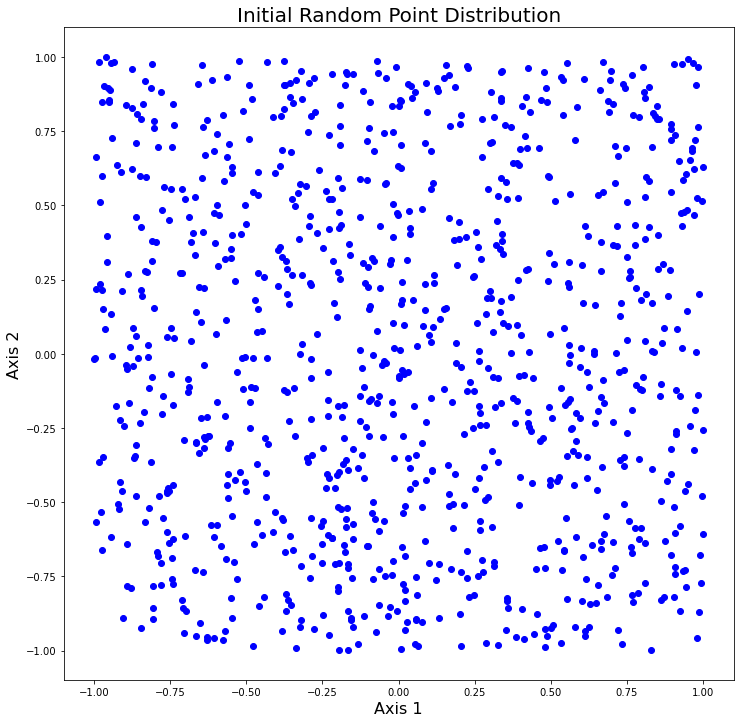

In [27]:
coords = np.random.uniform(-1.0, 1.0, size = (985, 2))
fig=plt.figure(figsize = (12,12))
ax = fig.add_subplot()
ax.set_title('Initial Random Point Distribution', fontsize = 20)
ax.set_xlabel('Axis 1', fontsize=16)
ax.set_ylabel('Axis 2', fontsize=16)
ax = plt.scatter(coords[:,0], coords[:,1], color = 'blue')

/var/folders/qc/kdqppv890tsc3zsxkk7rypjm0000gs/T/ipykernel_85192/581126053.py:6: RuntimeWarning: invalid value encountered in sqrt
  V_til = eigvec @ np.sqrt(np.diag(eigval))


[2.57178462e+01 1.46801278e+01 8.97133145e+00 7.96548005e+00
 6.97973919e+00 6.41075784e+00 5.73621906e+00 5.25090102e+00
 4.80383807e+00 4.35671077e+00 4.24980073e+00 4.11165056e+00
 3.87449417e+00 3.58972642e+00 3.37948895e+00 3.24920680e+00
 3.17318065e+00 2.97141001e+00 2.78195666e+00 2.71616836e+00
 2.64776134e+00 2.58773577e+00 2.51075494e+00 2.39774343e+00
 2.37046264e+00 2.33382297e+00 2.25257703e+00 2.21542716e+00
 2.14380932e+00 2.10997816e+00 2.09002240e+00 2.03608800e+00
 2.00529815e+00 1.98163777e+00 1.90700733e+00 1.90444909e+00
 1.86087185e+00 1.82642407e+00 1.81328153e+00 1.77747271e+00
 1.74383515e+00 1.71915190e+00 1.69851531e+00 1.65797460e+00
 1.63111283e+00 1.61079955e+00 1.58701690e+00 1.56218362e+00
 1.52340814e+00 1.51614543e+00 1.48286001e+00 1.46459540e+00
 1.44837956e+00 1.43805039e+00 1.41443138e+00 1.41253775e+00
 1.37895158e+00 1.36398591e+00 1.34427618e+00 1.32992879e+00
 1.30775708e+00 1.28869712e+00 1.27363370e+00 1.26163622e+00
 1.24925747e+00 1.242031

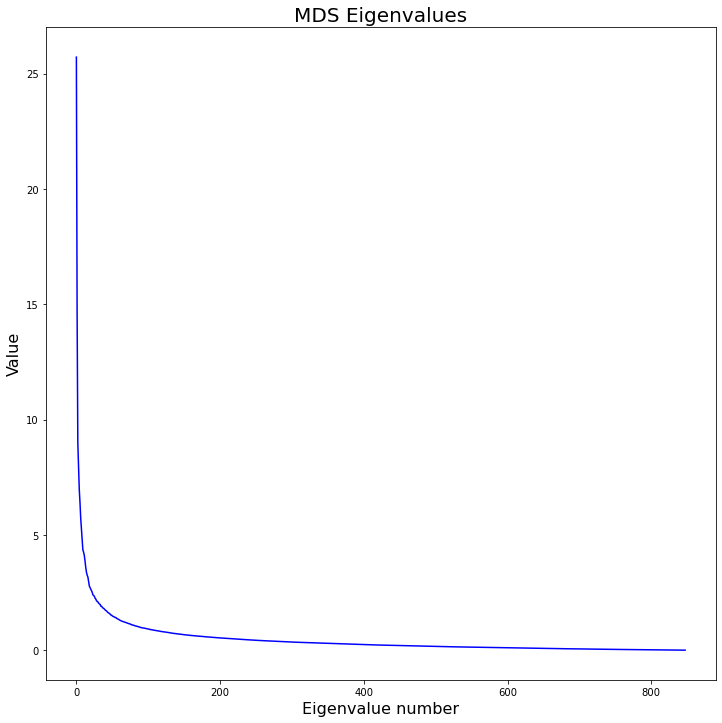

In [28]:
a = -0.5 * (1-tanimoto_matrix) ** 2
# doubly center data
H = np.eye(a.shape[0])-(1/(a.shape[0]))*np.ones(a.shape)
B = H @ a @ H
eigval, eigvec, = np.linalg.eig(B)
V_til = eigvec @ np.sqrt(np.diag(eigval))
# Now find the number of positive eigen values, and just to get the positive columns.
d = np.real(sorted([i for i in eigval if i > 0], reverse = True))
print(d)
print(len(d))
fig=plt.figure(figsize = (12, 12))
ax = fig.add_subplot()
ax.set_title('MDS Eigenvalues', fontsize=20)
ax.set_xlabel('Eigenvalue number', fontsize=16)
ax.set_ylabel('Value', fontsize=16)
ax = plt.plot(range(len(d)), d, color = 'blue')
plt.savefig('./SMILESMDSEigVal.png', bbox_inches='tight')
plt.savefig('./SMILESMDSEigVal.pdf', bbox_inches='tight')

In [10]:
tot_eig = d.sum()
tot_eig

427.65088951367727

In [11]:
running = 0
for ind_, val in enumerate(d):
    running += val
    if(running/tot_eig > 0.95):
        print(f'Number of dimensions needed to reduce strain 5%: {ind_}')
        break

Number of dimensions needed to reduce strain 5%: 517


In [12]:
d

array([2.57178462e+01, 1.46801278e+01, 8.97133145e+00, 7.96548005e+00,
       6.97973919e+00, 6.41075784e+00, 5.73621906e+00, 5.25090102e+00,
       4.80383807e+00, 4.35671077e+00, 4.24980073e+00, 4.11165056e+00,
       3.87449417e+00, 3.58972642e+00, 3.37948895e+00, 3.24920680e+00,
       3.17318065e+00, 2.97141001e+00, 2.78195666e+00, 2.71616836e+00,
       2.64776134e+00, 2.58773577e+00, 2.51075494e+00, 2.39774343e+00,
       2.37046264e+00, 2.33382297e+00, 2.25257703e+00, 2.21542716e+00,
       2.14380932e+00, 2.10997816e+00, 2.09002240e+00, 2.03608800e+00,
       2.00529815e+00, 1.98163777e+00, 1.90700733e+00, 1.90444909e+00,
       1.86087185e+00, 1.82642407e+00, 1.81328153e+00, 1.77747271e+00,
       1.74383515e+00, 1.71915190e+00, 1.69851531e+00, 1.65797460e+00,
       1.63111283e+00, 1.61079955e+00, 1.58701690e+00, 1.56218362e+00,
       1.52340814e+00, 1.51614543e+00, 1.48286001e+00, 1.46459540e+00,
       1.44837956e+00, 1.43805039e+00, 1.41443138e+00, 1.41253775e+00,
      

In [13]:
opt_eig = 0
indices=[]
for ind, val in enumerate(d):
    if val >= 2.5:
        indices.append(ind)
        opt_eig += 1
        
# The enumerate command calls on the index from the array, we are specifcally calling on the values from d
# Always use the empty brackets to create a list at the begining of the code, other wide you will be looping
# and appending over a value, which the program will dislike.
# Play around with the function parts of the for loop to see which will give the best results, for example, changing
# the < or > sign around. 

In [14]:
opt_eig

23

In [15]:
indices

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22]

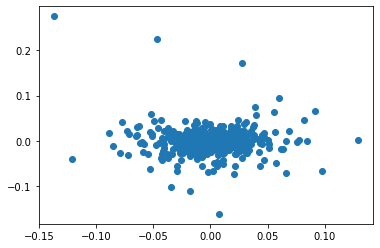

In [16]:
x_axis = np.real(V_til[0])
y_axis = np.real(V_til[1])
plt.scatter(x_axis, y_axis)

In [17]:
from rdkit.Chem import FunctionalGroups
fgs = FunctionalGroups.BuildFuncGroupHierarchy()

from collections import namedtuple
nt = namedtuple('pattern', 'smarts mol')
def flattenFgs(fgs,res):
    if not fgs:
        return
    for x in fgs:
        res[x.label]=nt(x.smarts,x.pattern)
        flattenFgs(x.children,res)

allFgDefs={}
flattenFgs(fgs,allFgDefs)
allFgNames=sorted(allFgDefs.keys())

In [18]:
ring_smiles = pd.read_csv('./RingSmiles.csv')
ring_smiles['FuncGrp'] = np.nan
ring_smiles

,Unnamed: 0,0,FuncGrp
0,0,Cc1ccc2c(c1)cc(C(=O)N1CC[C@H](C(=O)N3CCCCC3)C1...,NaN
1,1,O[C@@H]1C=C[C@H](O)[C@H](O)[C@@H]1O,NaN
2,2,C1CC1N[C@@H]1CCCSC1,NaN
3,3,CC1(C)CC[C@H](C#N)N1O,NaN
4,4,O=C1CCC[C@H](O)N1,NaN
...,...,...,...
995,995,Cc1csc(CO)c1,NaN
996,996,Nc1nccn[n+]1[O-],NaN
997,997,C[C@H]1SC(=N)NC1=O,NaN
998,998,CCn1cccc1C#N,NaN


In [19]:
mols = [Chem.MolFromSmiles(smi) for smi in ring_smiles['0']]

allFgs={}
for fgn in allFgNames:
    patt = allFgDefs[fgn]
    allFgs[fgn]=[m for m in mols if m.HasSubstructMatch(patt.mol)]

In [20]:
allFgs

{'AcidChloride': [],
 'AcidChloride.Aliphatic': [],
 'AcidChloride.Aromatic': [],
 'Alcohol': [<rdkit.Chem.rdchem.Mol at 0x15c0ad360>,
 'Alcohol.Aliphatic': [<rdkit.Chem.rdchem.Mol at 0x15c0ad360>,
 'Alcohol.Aromatic': [<rdkit.Chem.rdchem.Mol at 0x15c0adcc0>,
 'Aldehyde': [<rdkit.Chem.rdchem.Mol at 0x15c0ad6c0>,
 'Aldehyde.Aliphatic': [<rdkit.Chem.rdchem.Mol at 0x15bfd9a20>,
 'Aldehyde.Aromatic': [<rdkit.Chem.rdchem.Mol at 0x15c0ad6c0>,
 'Amine': [<rdkit.Chem.rdchem.Mol at 0x15c0acf40>,
 'Amine.Aliphatic': [<rdkit.Chem.rdchem.Mol at 0x15c0acf40>,
 'Amine.Aromatic': [<rdkit.Chem.rdchem.Mol at 0x15c0ad6c0>,
 'Amine.Cyclic': [<rdkit.Chem.rdchem.Mol at 0x15c0ad660>,
 'Amine.Primary': [<rdkit.Chem.rdchem.Mol at 0x15c0ace20>,
 'Amine.Primary.Aliphatic': [<rdkit.Chem.rdchem.Mol at 0x15c0ace20>,
 'Amine.Primary.Aromatic': [<rdkit.Chem.rdchem.Mol at 0x15c0ad6c0>,
 'Amine.Secondary': [<rdkit.Chem.rdchem.Mol at 0x15c0acf40>,
 'Amine.Secondary.Aliphatic': [<rdkit.Chem.rdchem.Mol at 0x15c0acf40>,
 

In [21]:
fg_binned = {}
for fgn in allFgNames:
    patt = allFgDefs[fgn]
    fg_binned[fgn]=[ind for ind, m in enumerate(mols) if m.HasSubstructMatch(patt.mol)]
    print('%s: Found %d '%(fgn,len(fg_binned[fgn])))

AcidChloride: Found 0 
AcidChloride.Aliphatic: Found 0 
AcidChloride.Aromatic: Found 0 
Alcohol: Found 155 
Alcohol.Aliphatic: Found 136 
Alcohol.Aromatic: Found 23 
Aldehyde: Found 36 
Aldehyde.Aliphatic: Found 15 
Aldehyde.Aromatic: Found 22 
Amine: Found 346 
Amine.Aliphatic: Found 276 
Amine.Aromatic: Found 73 
Amine.Cyclic: Found 127 
Amine.Primary: Found 154 
Amine.Primary.Aliphatic: Found 105 
Amine.Primary.Aromatic: Found 51 
Amine.Secondary: Found 109 
Amine.Secondary.Aliphatic: Found 93 
Amine.Secondary.Aromatic: Found 16 
Amine.Tertiary: Found 69 
Amine.Tertiary.Aliphatic: Found 64 
Amine.Tertiary.Aromatic: Found 6 
Azide: Found 1 
Azide.Aliphatic: Found 1 
Azide.Aromatic: Found 0 
BoronicAcid: Found 0 
BoronicAcid.Aliphatic: Found 0 
BoronicAcid.Aromatic: Found 0 
CarboxylicAcid: Found 40 
CarboxylicAcid.Aliphatic: Found 30 
CarboxylicAcid.AlphaAmino: Found 1 
CarboxylicAcid.Aromatic: Found 10 
Halogen: Found 167 
Halogen.Aliphatic: Found 63 
Halogen.Aromatic: Found 109 
Ha

In [22]:
fg_binned['Aldehyde.Aliphatic']

[199, 214, 215, 272, 282, 302, 397, 623, 630, 789, 831, 902, 911, 965, 976]

In [23]:
# Coarse grain bin the solute database
for smi in ring_smiles['0']:
    mol_ = Chem.MolFromSmiles(smi)
    for fgn in allFgNames:
        patt = allFgDefs[fgn]
        batch = fgn.split('.')[0]
        if  mol_.HasSubstructMatch(patt.mol):
            ring_smiles.loc[ring_smiles['0'] == smi, 'FuncGrp'] = batch

In [24]:
ring_smiles

,Unnamed: 0,0,FuncGrp
0,0,Cc1ccc2c(c1)cc(C(=O)N1CC[C@H](C(=O)N3CCCCC3)C1...,NaN
1,1,O[C@@H]1C=C[C@H](O)[C@H](O)[C@@H]1O,Alcohol
2,2,C1CC1N[C@@H]1CCCSC1,Amine
3,3,CC1(C)CC[C@H](C#N)N1O,NaN
4,4,O=C1CCC[C@H](O)N1,Alcohol
...,...,...,...
995,995,Cc1csc(CO)c1,Alcohol
996,996,Nc1nccn[n+]1[O-],Amine
997,997,C[C@H]1SC(=N)NC1=O,NaN
998,998,CCn1cccc1C#N,NaN


In [25]:
fg_hist = {}
for key in fg_binned.keys():
    fg_hist[key] = len(fg_binned[key])
fg_hist

{'AcidChloride': 0,
 'AcidChloride.Aliphatic': 0,
 'AcidChloride.Aromatic': 0,
 'Alcohol': 155,
 'Alcohol.Aliphatic': 136,
 'Alcohol.Aromatic': 23,
 'Aldehyde': 36,
 'Aldehyde.Aliphatic': 15,
 'Aldehyde.Aromatic': 22,
 'Amine': 346,
 'Amine.Aliphatic': 276,
 'Amine.Aromatic': 73,
 'Amine.Cyclic': 127,
 'Amine.Primary': 154,
 'Amine.Primary.Aliphatic': 105,
 'Amine.Primary.Aromatic': 51,
 'Amine.Secondary': 109,
 'Amine.Secondary.Aliphatic': 93,
 'Amine.Secondary.Aromatic': 16,
 'Amine.Tertiary': 69,
 'Amine.Tertiary.Aliphatic': 64,
 'Amine.Tertiary.Aromatic': 6,
 'Azide': 1,
 'Azide.Aliphatic': 1,
 'Azide.Aromatic': 0,
 'BoronicAcid': 0,
 'BoronicAcid.Aliphatic': 0,
 'BoronicAcid.Aromatic': 0,
 'CarboxylicAcid': 40,
 'CarboxylicAcid.Aliphatic': 30,
 'CarboxylicAcid.AlphaAmino': 1,
 'CarboxylicAcid.Aromatic': 10,
 'Halogen': 167,
 'Halogen.Aliphatic': 63,
 'Halogen.Aromatic': 109,
 'Halogen.Bromine': 25,
 'Halogen.Bromine.Aliphatic': 3,
 'Halogen.Bromine.Aromatic': 22,
 'Halogen.Bromine

In [69]:
fg_binned = {}
for key, val in fg_hist.items():
    if (len(key.split('.')) < 2):
        fg_binned[key] = val
        
fg_binned

{'AcidChloride': 0,
 'Alcohol': 155,
 'Aldehyde': 36,
 'Amine': 346,
 'Azide': 1,
 'BoronicAcid': 0,
 'CarboxylicAcid': 40,
 'Halogen': 167,
 'Isocyanate': 1,
 'Nitro': 10,
 'SulfonylChloride': 0,
 'TerminalAlkyne': 6}

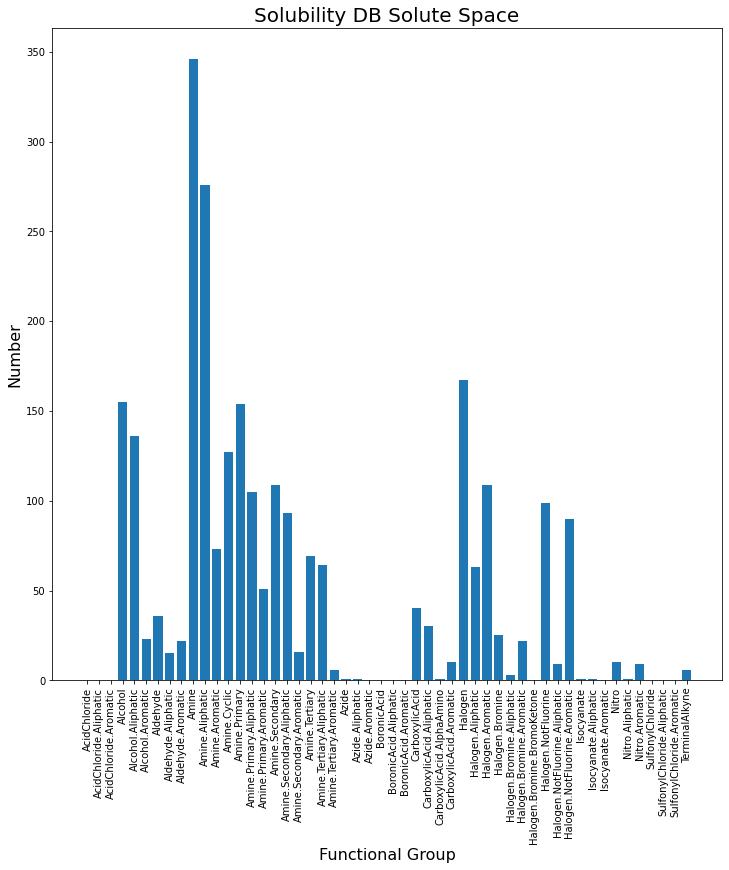

In [72]:
fig=plt.figure(figsize = (12, 12))
ax = fig.add_subplot()
ax.set_title('Solubility DB Solute Space', fontsize=20)
ax.set_xlabel('Functional Group', fontsize=16)
ax.set_ylabel('Number', fontsize=16)
ax = plt.bar(fg_hist.keys(), fg_hist.values())
plt.xticks(rotation=90)
plt.savefig('./SmileFuncGrps.png', bbox_inches='tight')
plt.savefig('./SmileFuncGrps.pdf', bbox_inches='tight')

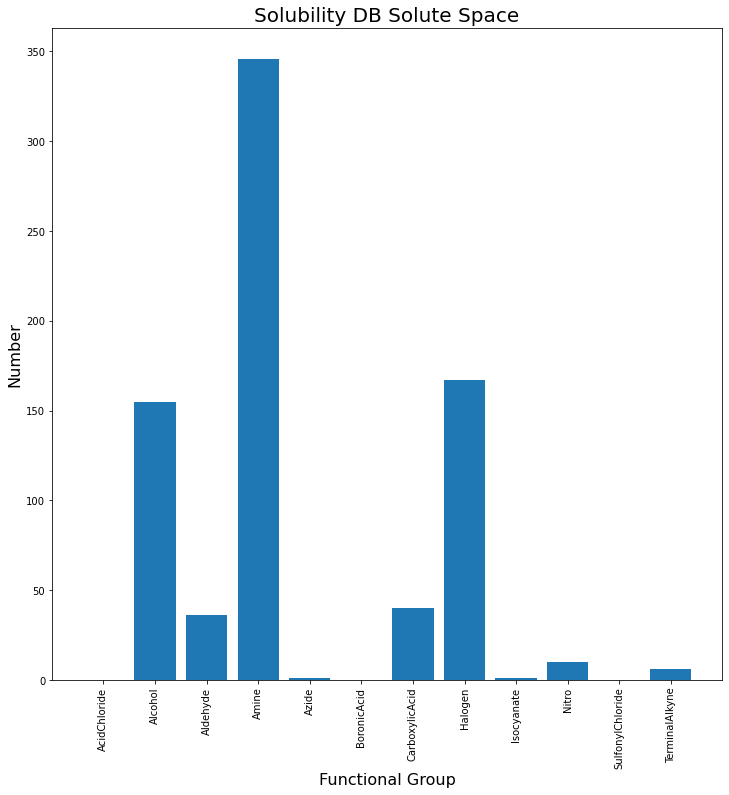

In [71]:
fig=plt.figure(figsize = (12, 12))
ax = fig.add_subplot()
ax.set_title('Solubility DB Solute Space', fontsize=20)
ax.set_xlabel('Functional Group', fontsize=16)
ax.set_ylabel('Number', fontsize=16)
ax = plt.bar(fg_binned.keys(), fg_binned.values())
plt.xticks(rotation=90)
plt.savefig('./SmileFuncGrpsBin.png', bbox_inches='tight')
plt.savefig('./SmileFuncGrpsBin.pdf', bbox_inches='tight')